# Visualization

In [9]:
import geopandas as gpd
import mapclassify
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [10]:
# Load data
gdf = gpd.read_file('./va_admin_bndry/VirginiaCounty_ClippedToShoreline.shx')
mdf = pd.read_csv('properly_merged_data.csv')

In [11]:
# Merge shapefile data and county adjacency data:
gdf['FIPS_left'] = pd.to_numeric(gdf['STCOFIPS']) 
df = gdf.merge(mdf,left_on='FIPS_left',right_on='county_fips')
del gdf, mdf

In [12]:
vdf = pd.read_csv('./data/voting_VA.csv') # Load historical voting data
cdf = pd.read_csv('./data/county_adjacencies.csv') 

In [19]:
vdf.head()

,Unnamed: 0,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
0,11161,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,AL GORE,DEMOCRAT,5092,11925,20220315,TOTAL
1,11162,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,6352,11925,20220315,TOTAL
2,11163,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,RALPH NADER,GREEN,220,11925,20220315,TOTAL
3,11164,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,OTHER,OTHER,261,11925,20220315,TOTAL
4,11165,2000,VIRGINIA,VA,ALBEMARLE,51003,US PRESIDENT,AL GORE,DEMOCRAT,16255,36846,20220315,TOTAL


In [14]:
df20 = vdf.loc[ vdf['year']==2020,:]

Dvotes = df20.loc[(df20['party']=='DEMOCRAT'),:].groupby('county_fips')['candidatevotes'].sum()
Dvotes = Dvotes.rename('dem_votes_2020')
df = df.merge(Dvotes,left_on='FIPS_left',right_on='county_fips') 

Rvotes = df20.loc[(df20['party']=='REPUBLICAN'),:].groupby('county_fips')['candidatevotes'].sum()
Rvotes = Rvotes.rename('rep_votes_2020')
df = df.merge(Rvotes,left_on='FIPS_left',right_on='county_fips')

In [15]:
df.head(20)

,STCOFIPS,GNIS,NAME,NAMELSAD,GSOURCE,LADOPT,LASTUPDATE,JURISTYPE,AREASQMI,Shape_Leng,...,AB2AA,BD5AA,AX6AA,CL6AA,AX7AA,AX7AB,BV8AA,BV8AB,dem_votes_2020,rep_votes_2020
0,51001,1480091,Accomack,Accomack County,T,N,2014-08-20,CO,1195.366291,4949956.957,...,34821.0,16309.0,37715.0,6788.0,6788.0,30927.0,957.0,5291.0,7578,9172
1,51001,1480091,Accomack,Accomack County,T,N,2014-08-20,CO,1195.366291,4949956.957,...,34821.0,16309.0,37715.0,6788.0,6788.0,30927.0,957.0,5291.0,7578,9172
2,51001,1480091,Accomack,Accomack County,T,N,2014-08-20,CO,1195.366291,4949956.957,...,34821.0,16309.0,37715.0,6788.0,6788.0,30927.0,957.0,5291.0,7578,9172
3,51001,1480091,Accomack,Accomack County,T,N,2014-08-20,CO,1195.366291,4949956.957,...,34821.0,16309.0,37715.0,6788.0,6788.0,30927.0,957.0,5291.0,7578,9172
4,51001,1480091,Accomack,Accomack County,T,N,2014-08-20,CO,1195.366291,4949956.957,...,34821.0,16309.0,37715.0,6788.0,6788.0,30927.0,957.0,5291.0,7578,9172
5,51001,1480091,Accomack,Accomack County,T,N,2014-08-20,CO,1195.366291,4949956.957,...,34821.0,16309.0,37715.0,6788.0,6788.0,30927.0,957.0,5291.0,7578,9172
6,51001,1480091,Accomack,Accomack County,T,N,2014-08-20,CO,1195.366291,4949956.957,...,34821.0,16309.0,37715.0,6788.0,6788.0,30927.0,957.0,5291.0,7578,9172
7,51001,1480091,Accomack,Accomack County,T,N,2014-08-20,CO,1195.366291,4949956.957,...,50250.0,22909.0,33012.0,6678.0,6678.0,26334.0,1002.0,5147.0,7578,9172
8,51001,1480091,Accomack,Accomack County,T,N,2014-08-20,CO,1195.366291,4949956.957,...,50250.0,22909.0,33012.0,6678.0,6678.0,26334.0,1002.0,5147.0,7578,9172
9,51001,1480091,Accomack,Accomack County,T,N,2014-08-20,CO,1195.366291,4949956.957,...,50250.0,22909.0,33012.0,6678.0,6678.0,26334.0,1002.0,5147.0,7578,9172


Population

<Axes: >

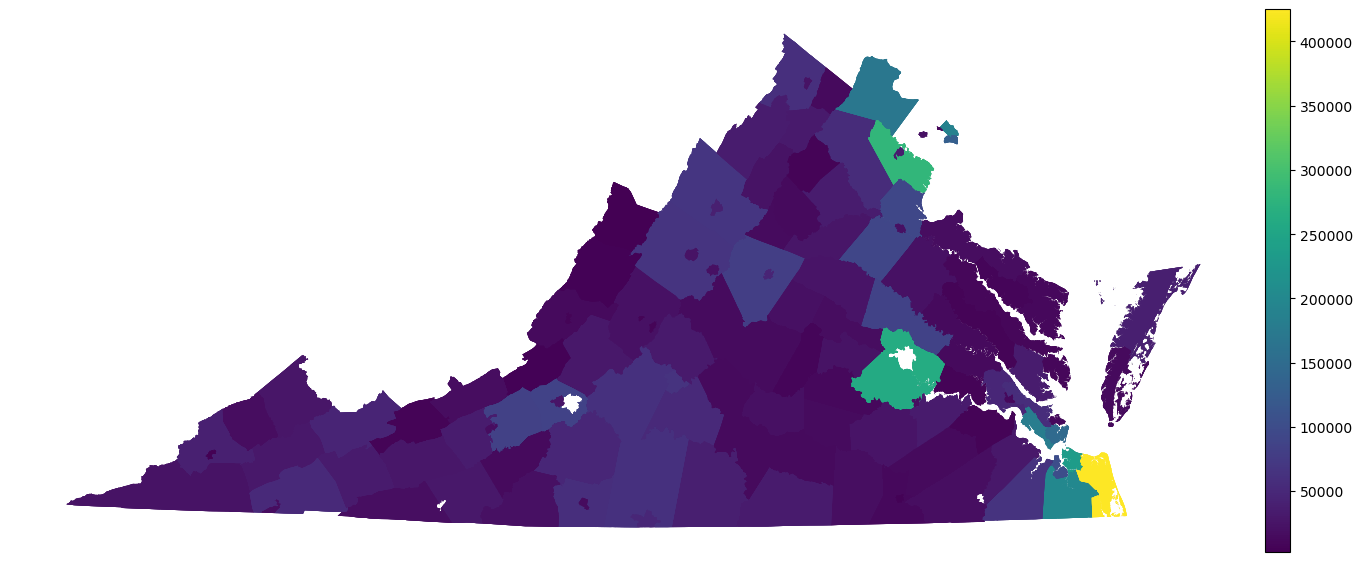

In [22]:
# for 2000 data
df2000 = df[df['year'] == 2000]
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
df2000.plot(ax=ax,column='AV0AA',legend=True,cax=cax)

# Demographic Data

In [9]:
merged  = pd.read_csv('properly_merged_data.csv')
merged.head(20)

,year,county_name,county_fips,candidate,party,candidatevotes,totalvotes,district,N1,N2,...,A88AD,A88AE,AB2AA,BD5AA,AX6AA,CL6AA,AX7AA,AX7AB,BV8AA,BV8AB
0,2000,ACCOMACK,51001,AL GORE,DEMOCRAT,5092,11925,2,NORTHUMBERLAND,LANCASTER,...,3781.0,3195.0,34821.0,16309.0,37715.0,6788.0,6788.0,30927.0,957.0,5291.0
1,2000,ACCOMACK,51001,GEORGE W. BUSH,REPUBLICAN,6352,11925,2,NORTHUMBERLAND,LANCASTER,...,3781.0,3195.0,34821.0,16309.0,37715.0,6788.0,6788.0,30927.0,957.0,5291.0
2,2000,ACCOMACK,51001,RALPH NADER,GREEN,220,11925,2,NORTHUMBERLAND,LANCASTER,...,3781.0,3195.0,34821.0,16309.0,37715.0,6788.0,6788.0,30927.0,957.0,5291.0
3,2000,ACCOMACK,51001,OTHER,OTHER,261,11925,2,NORTHUMBERLAND,LANCASTER,...,3781.0,3195.0,34821.0,16309.0,37715.0,6788.0,6788.0,30927.0,957.0,5291.0
4,2004,ACCOMACK,51001,JOHN KERRY,DEMOCRAT,5518,13356,2,NORTHUMBERLAND,LANCASTER,...,3781.0,3195.0,34821.0,16309.0,37715.0,6788.0,6788.0,30927.0,957.0,5291.0
5,2004,ACCOMACK,51001,GEORGE W. BUSH,REPUBLICAN,7726,13356,2,NORTHUMBERLAND,LANCASTER,...,3781.0,3195.0,34821.0,16309.0,37715.0,6788.0,6788.0,30927.0,957.0,5291.0
6,2004,ACCOMACK,51001,OTHER,OTHER,112,13356,2,NORTHUMBERLAND,LANCASTER,...,3781.0,3195.0,34821.0,16309.0,37715.0,6788.0,6788.0,30927.0,957.0,5291.0
7,2008,ACCOMACK,51001,BARACK OBAMA,DEMOCRAT,7607,15623,2,NORTHUMBERLAND,LANCASTER,...,2649.0,4604.0,50250.0,22909.0,33012.0,6678.0,6678.0,26334.0,1002.0,5147.0
8,2008,ACCOMACK,51001,JOHN MCCAIN,REPUBLICAN,7833,15623,2,NORTHUMBERLAND,LANCASTER,...,2649.0,4604.0,50250.0,22909.0,33012.0,6678.0,6678.0,26334.0,1002.0,5147.0
9,2008,ACCOMACK,51001,OTHER,OTHER,183,15623,2,NORTHUMBERLAND,LANCASTER,...,2649.0,4604.0,50250.0,22909.0,33012.0,6678.0,6678.0,26334.0,1002.0,5147.0
